In [1]:
import mne

In [2]:
import os

# Change to the directory containing the BrainVision files
os.chdir('/Users/diana/EEG')

# Verify the current directory
print(os.getcwd())

/Users/diana/EEG


In [3]:
file_path = "/Users/diana/EEG/sub-1/ses-TestVibro/eeg/sub-1_ses-TestVibro_task-PredError_eeg.eeg"
print(os.path.exists(file_path))  # This should print True if the file exists

True


In [30]:
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)

# BIDS root directory
bids_root = "/Users/diana/EEG"  # Update this if necessary

# Subject and session identifiers
subject_id = '1'  # Modify subject to use 'sub-01' instead of 'sub-1'
session_id = 'TestEMS'  # Session identifier (no change needed)

# Define the BIDS path for the EEG data (no extension, MNE will handle it automatically)
bids_path = BIDSPath(subject=subject_id, session=session_id,
                     task="PredError", datatype="eeg", suffix="eeg", root=bids_root)


raw = read_raw_bids(bids_path)

raw.load_data()


# Print the BIDS path to verify it
print("BIDS path:", bids_path)

Extracting parameters from /Users/diana/EEG/sub-1/ses-TestEMS/eeg/sub-1_ses-TestEMS_task-PredError_eeg.vhdr...
Setting channel info structure...
Reading events from /Users/diana/EEG/sub-1/ses-TestEMS/eeg/sub-1_ses-TestEMS_task-PredError_events.tsv.
Reading channel info from /Users/diana/EEG/sub-1/ses-TestEMS/eeg/sub-1_ses-TestEMS_task-PredError_channels.tsv.
Reading 0 ... 258029  =      0.000 ...   516.064 secs...


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_67239/1802383238.py:16: RuntimeWarning: Unable to map the following column(s) to to MNE:
nr: 1
biological_sex: m
cap_size: 58
block_1: Visual
block_2: Visual + Vibro
block_3: Visual + Vibro + EMS
  raw = read_raw_bids(bids_path)


BIDS path: /Users/diana/EEG/sub-1/ses-TestEMS/eeg/sub-1_ses-TestEMS_task-PredError_eeg.vhdr


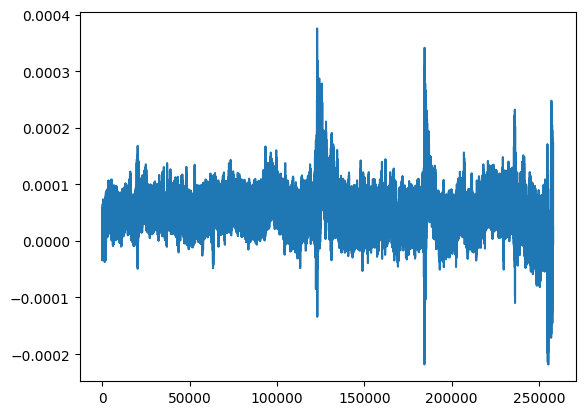

In [20]:
from matplotlib import pyplot as plt
plt.plot(raw[10,:][0].T)

In [50]:
# Step 1 Subtract 63 ms to account for EEG setup delay
raw.annotations.onset = raw.annotations.onset - 0.063


In [51]:
# Step 2 Re-sample the raw EEG data to 250 Hz
raw_resampled = raw.copy().resample(sfreq=250, npad="auto")

Sampling frequency of the instance is already 250.0, returning unmodified.


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 124.00 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 124.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_67239/2078479135.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmax=60)  # Before filtering
/Users/diana/miniconda3/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_67239/2078479135.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.plot_psd(fmax=60)  # After filtering
/Users/diana/miniconda3/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


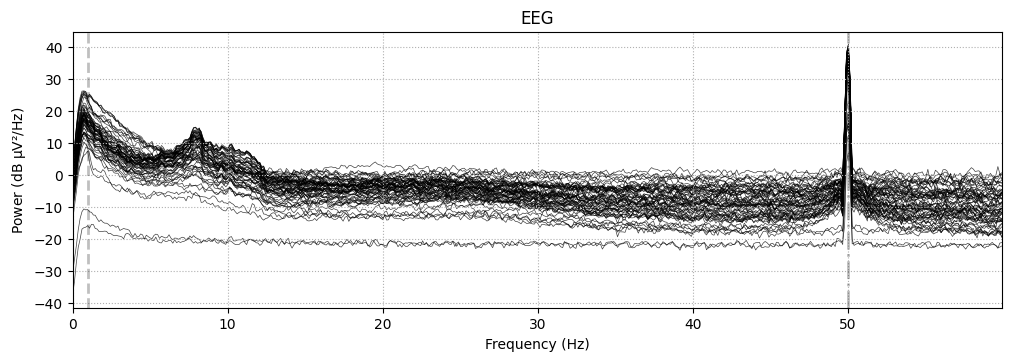

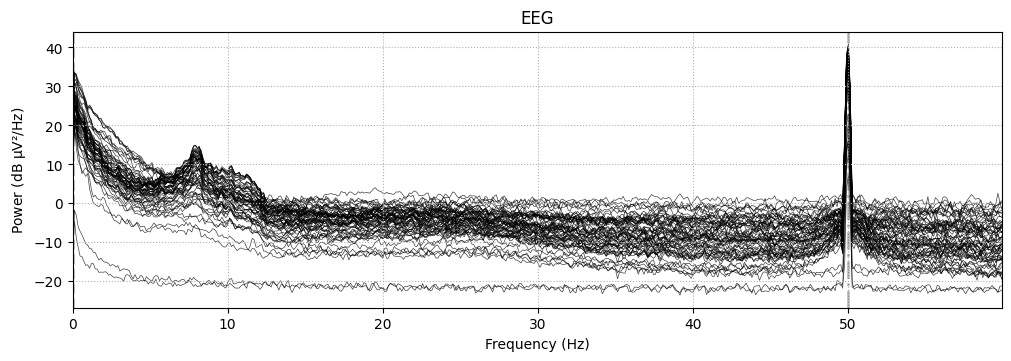

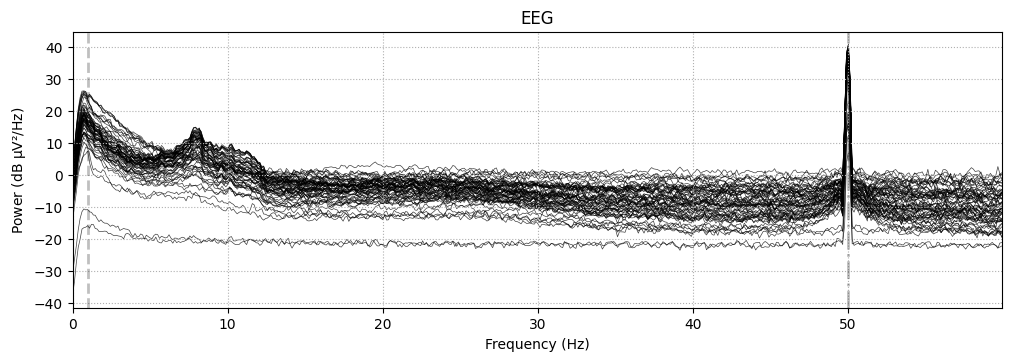

In [57]:
# Filtering 
# Step 3 High-pass filter at 1 Hz, low-pass filter at 125 Hz (at 124 cause of Nyquist)
filtered = raw_resampled.copy().filter(l_freq=1.0, h_freq=124.0)

# Plot the Power Spectral Density (PSD) before and after filtering
raw.plot_psd(fmax=60)  
filtered.plot_psd(fmax=60)  

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/var/folders/mh/2g8pjxqx2dldlw8dltkfmgvm0000gn/T/ipykernel_67239/1471971579.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filtered.plot_psd(fmax=60)
/Users/diana/miniconda3/lib/python3.11/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


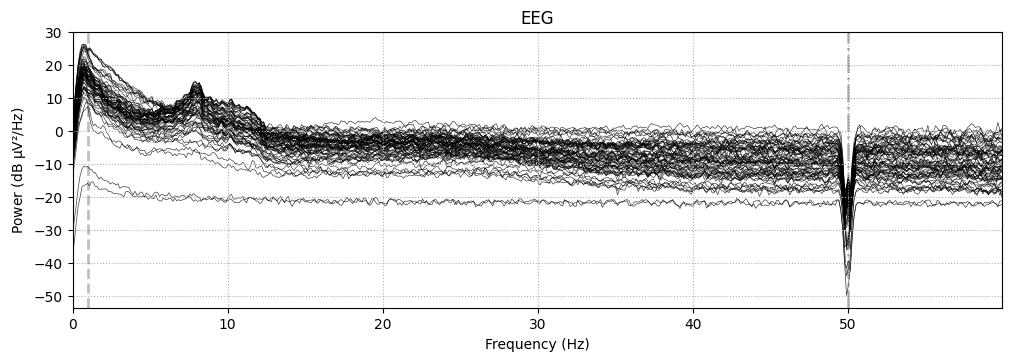

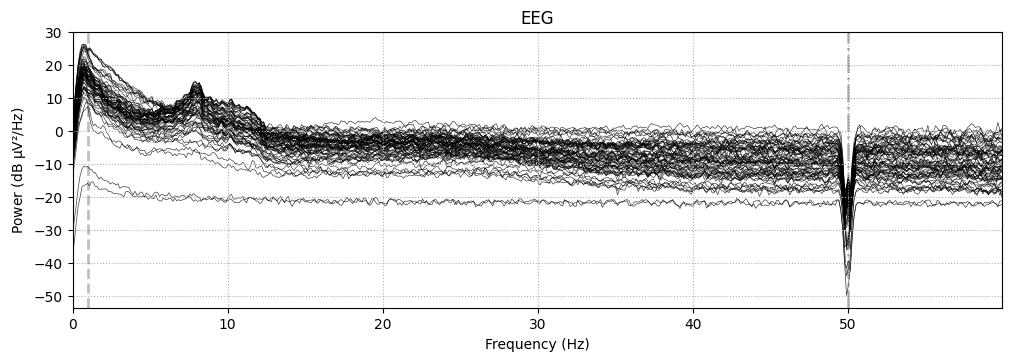

In [58]:
# Notch filter 50Hz to remove powerline artefact
raw_filtered = filtered.copy().notch_filter(freqs=50.0)
raw_filtered.plot_psd(fmax=60) 

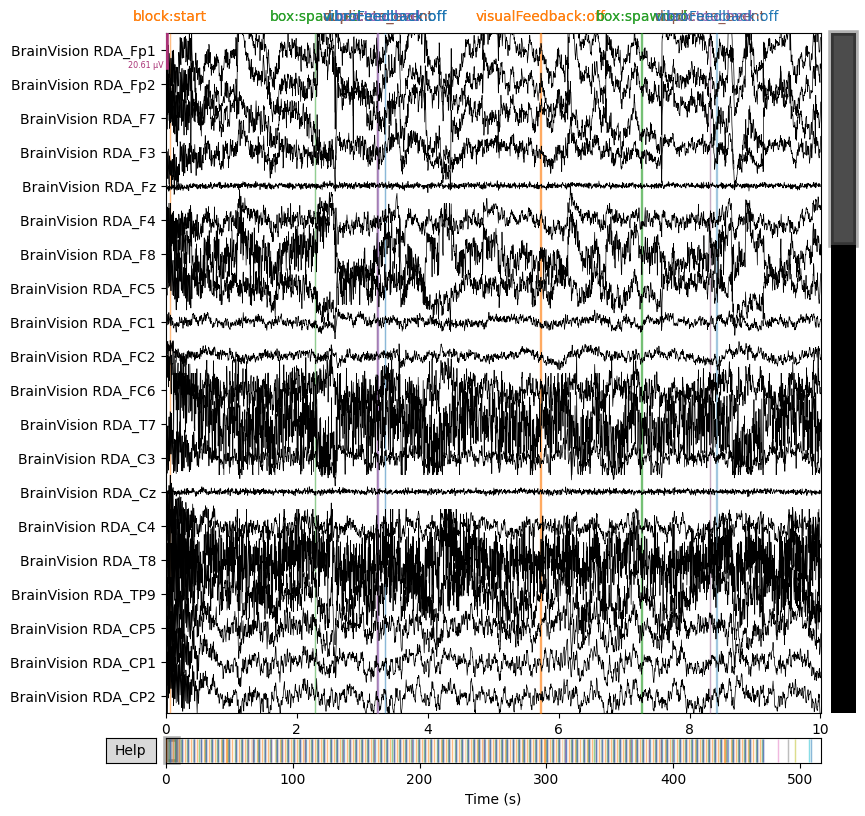

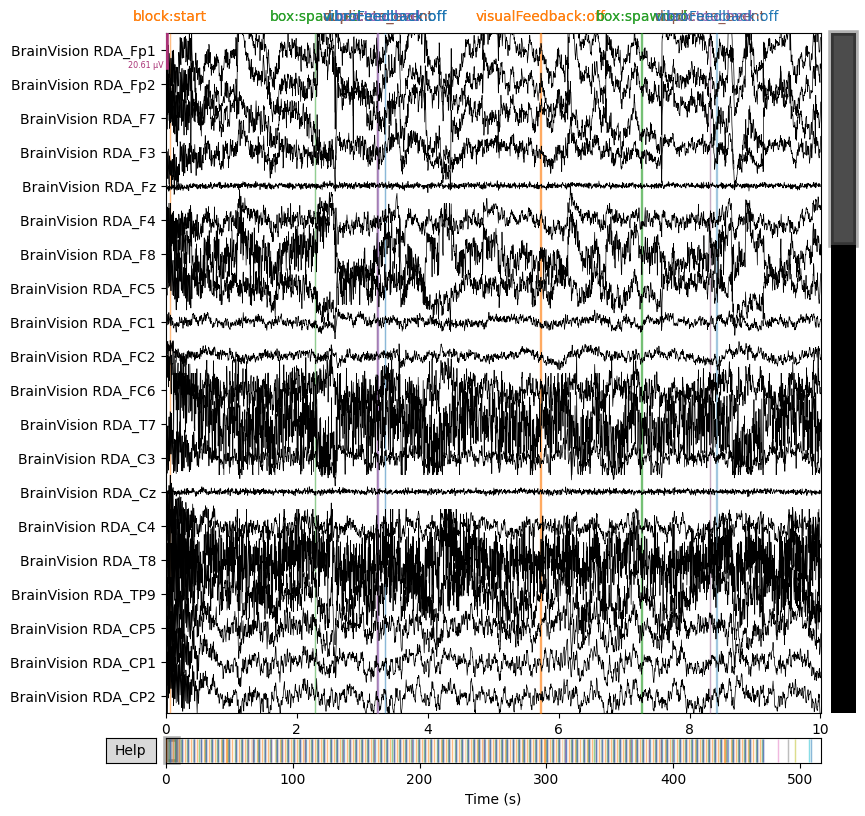

In [54]:
# Looking at EEG data

raw_filtered.plot(n_channels=20, scalings='auto', show=True, block=True)
